#**Ajuste lineal utilizando el metodo de minimos cuadrados**
El código que se muestra a continuacíon permite realizar ajustes por medio del
método de los mínimos cuadrados

In [ ]:
#Linea de codigo para importar la carpeta del drive al ambiente de google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Especificamos la ruta de la carpeta en la cual estaran los datos
from pathlib import Path
# the path of the directory which saves your .py file
src_dir1 = Path('/content/gdrive/MyDrive/Colab Notebooks/')

# add the path to system path
import sys
try:
  sys.path.index(str(src_dir1))
except ValueError:
  sys.path.insert(0,str(src_dir1))

# print system path
sys.path

['/content/gdrive/MyDrive/Colab Notebooks',
 '/content/drive/MyDrive/Colab Notebooks',
 '/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython']

In [ ]:
#Se importan las librerias necesarias para le funcionamiento del codigo
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Funcion para convertir string a float, devueve un lista np
def str2float(lst):
	return np.array([float(i) for i in lst])

In [ ]:
##########Ajuste Lineal de los datos##########
#calculo de la pendiente y el intercepto
def linearAdjust(x_exp, y_exp):
  slope = (n*sum(x_exp*y_exp)-sum(x_exp)*sum(y_exp))/(n*sum(x_exp**2) - sum(x_exp)**2)
  intercept = (sum(x_exp**2)*sum(y_exp) - sum(x_exp)*sum(x_exp*y_exp))/(n*sum(x_exp**2) - sum(x_exp)**2)

  #calculo de la desviacion estandar en Y
  dy=y_exp -(slope*x_exp+intercept)
  Dy = np.sqrt(sum(dy**2)/(n-2))

  #calculo del error en la pendiente
  Dm = Dy*np.sqrt(n/(n*sum(x_exp**2) -sum(x_exp)**2));

  #calculo del error en el intercepto
  Db = Dy/np.sqrt(n);

  #Coeficiente de correlacion lineal
  r1 = (n*sum(x_exp*y_exp)-sum(x_exp)*sum(y_exp));
  r2 = np.sqrt((n*sum(x_exp**2)-sum(x_exp)**2)*(n*sum(y_exp**2)-sum(y_exp)**2));
  r = np.abs(r1/r2);
  #%r = (n*sum(x.*y)-sum(x)*sum(y))/sqrt((n*sum(x.*x)-sum(x)^2)(n*sum(y.*y)-sum(y)^2));

  return slope, intercept, Dm, Db, Dy, r

In [ ]:
#Se pide el nombre de archivo
print("Nombre de archivo de los datos con extension: ", end="")
name = str(input())
#name = "nombre_archivo.csv"
print("Delimitador de campo: ", end="")
delimiter = str(input())
#delimiter = ';'
print("# de linea de inicio de datos: ", end="")
sLine = int(input())
#sLine = '1'

#Cargamos el archivo con los datos, estos deben estar en la misma carpeta del archivo fuente
fileData = np.loadtxt(sys.path[0]+'/'+name,dtype=str, delimiter=delimiter, skiprows = sLine)

Nombre de archivo de los datos con extension: caidaLibre.csv
Delimitador de campo: ;
# de linea de inicio de datos: 0


In [ ]:
##Proceso de extraccion de los datos del archivo de datos
#x_exp = np.array([float(i) for i in fileData[:,0]])
#y_exp = np.array([float(i) for i in fileData[:,1]])
x_exp = str2float(fileData[:,0])
y_exp = str2float(fileData[:,1])
n = x_exp.size

print("x data: {}".format(x_exp))
print("y data: {}".format(y_exp))
print("# data: {}".format(n))

x data: [0.148 0.196 0.244 0.29  0.315 0.352 0.385 0.403]
y data: [0.31622777 0.4472136  0.54772256 0.63245553 0.70710678 0.77459667
 0.83666003 0.89442719]
# data: 8


In [ ]:
#Realizamos el ajuste
pendiente, intercepto, errorP, errorI, errorY, coeficienteR= linearAdjust(x_exp, y_exp)
print("##########Ajuste Lineal de los datos##########")
print("pendiente: {}".format(pendiente))
print("intercepto: {}".format(intercepto))
print("maximo error en Dy: {}".format(errorY))
print("error en Pendiente: {}".format(errorP))
print("error en intercepto: {}".format(errorI))
print("Coeficiente de Correlacion Lineal (R^2): {}".format(coeficienteR))
print("##############################################")

##########Ajuste Lineal de los datos##########
pendiente: 2.1921804684419586
intercepto: 0.005256635767822537
maximo error en Dy: 0.011454001849149879
error en Pendiente: 0.04782563249633462
error en intercepto: 0.004049601189628567
Coeficiente de Correlacion Lineal (R^2): 0.9985751763032072
##############################################


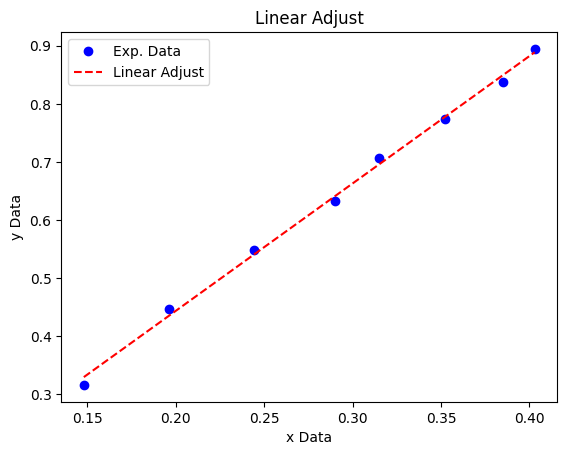

In [ ]:
##Se realiza el grafico del ajuste
x_teo = np.linspace(x_exp[0], x_exp[n-1], n*100)
y_teo = pendiente*x_teo + intercepto

#print("Datos en x: %f", x_exp)
#print("Datos en y: %f", y_exp)
plt.figure()
plt.plot(x_exp,y_exp,"bo", label="Exp. Data")
plt.plot(x_teo,y_teo,"r--", label="Linear Adjust")
plt.xlabel("x Data") ##Se deben cambiar los labels  tanto en x y y
plt.ylabel("y Data")
plt.title("Linear Adjust") ##Con esta instruccion se ajuste el texto
plt.legend()
plt.savefig(sys.path[0]+'/'+"linearAdjust.png")
plt.show()

#Se leen los datos en el archivo de texto